# Estudio de influencias sobre la salud mental

Vamos a intentar encontrar qué factores afectan a la salud mental

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Primer DataSet: Salud Mental

Nuestro primer DataSet estudia el nivel de estrés creciente y l cantidad de personas que están tratadas de enfermedades mentales respecto a varios factores

In [199]:
data = pd.read_csv('data/Mental_Health.csv')
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

### Limpiamos los datos:

In [201]:
## Vemos que hay varios datos con valores nulos:
data.dropna(axis=0, inplace=True)
data.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [202]:
# Cambiamos el nombre de las columnas para que nos sea mas facil acceder a ellas:
data = data.rename(columns={'Timestamp':'timestamp', 'Gender':'gender', 'Country':'country', 'Occupation':'occupation', 'Days_Indoors':'days_indoors', 'Growing_Stress':'growing_stress', 'Changes_Habits':'changes_habits', 'Mental_Health_History':'mh_history', 'Mood_Swings':'mood_swings', 'Coping_Struggles':'coping_struggles', 'Work_Interest':'work_interest', 'Social_Weakness':'social_weakness' })

In [203]:
# Convertimos la columna timestamp en un datetime para poder manejarlo
data.timestamp = pd.to_datetime(data.timestamp)

# Sacamos el año
data['year'] = data.timestamp.dt.year

# Sacamos el mes
data['month'] = data.timestamp.dt.month

# Quitamos la columna timestamp ya que no nos ayudara ya:
data.drop(columns=['timestamp'], inplace=True)

data.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,2014,8
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,2014,8
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,2014,8
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,2014,8
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,2014,8


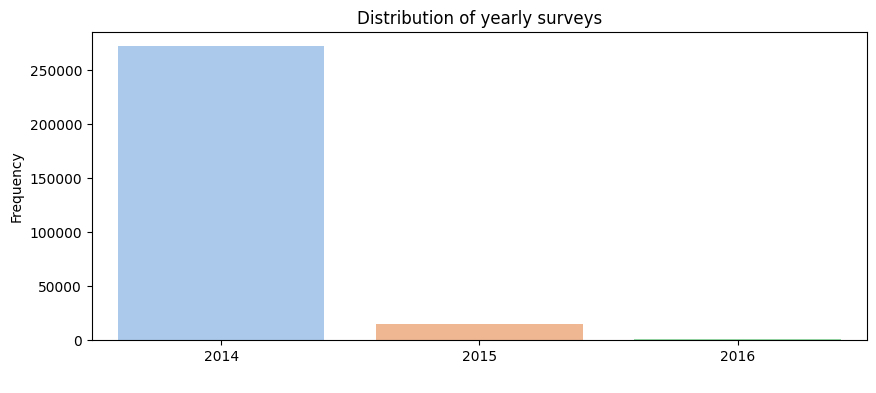

In [204]:
# Vamos a ver si hay muchas diferencias en los años en los que se han hecho los estudios para ver si hay que tenerlo en cuenta
plt.figure(figsize=(10, 4))
sns.countplot(x='year', data=data, palette="pastel")
plt.title('Distribution of yearly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

# Vemos que casi todos los estudios se han hecho en el 2014, por lo que el año no sera algo considerable en el analisis

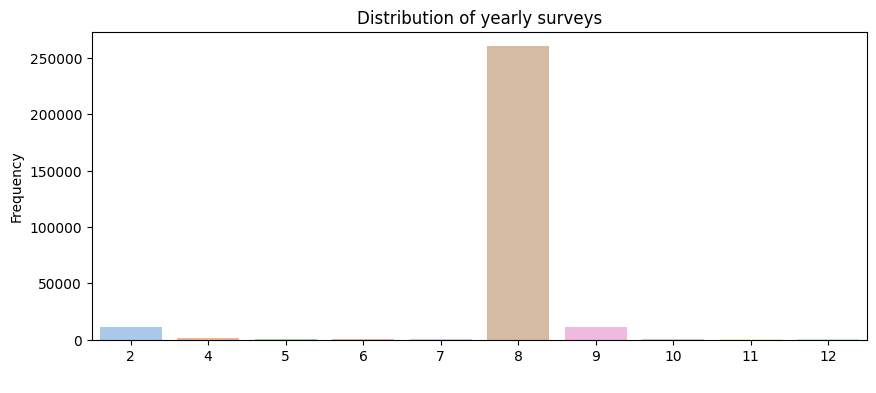

In [205]:
# Haremos lo mismo con los meses, las estaciones si son algo que pueden hacer variar bastante los estados de animo:
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=data, palette="pastel")
plt.title('Distribution of yearly surveys')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

# Casi todos estan hechos en agosto, despreciamos la fecha
# Aun asi, si deberemos considerar si los datos de estres y tratamiento son bajos puede ser un factor que sea verano

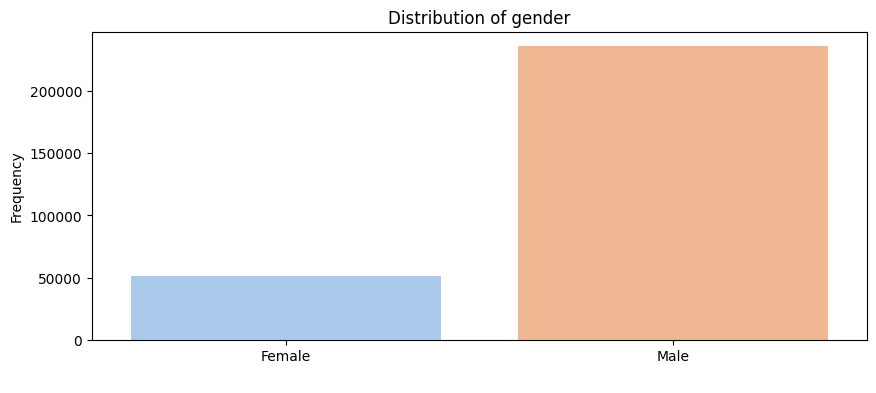

In [206]:
plt.figure(figsize=(10, 4))
sns.countplot(x='gender', data=data, palette="pastel")
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()


In [207]:
# Transformamos en 0 y 1 los valores del genero
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Female' else 0)

data["gender"].mean()
# La proporcion de mujeres en el estudio representa solo un 17.83% de la muestra

0.17833835953225008

### Vida laboral

Vamos a estudiar el nivel de motivacion en el trabajo y el estres en cada profesion

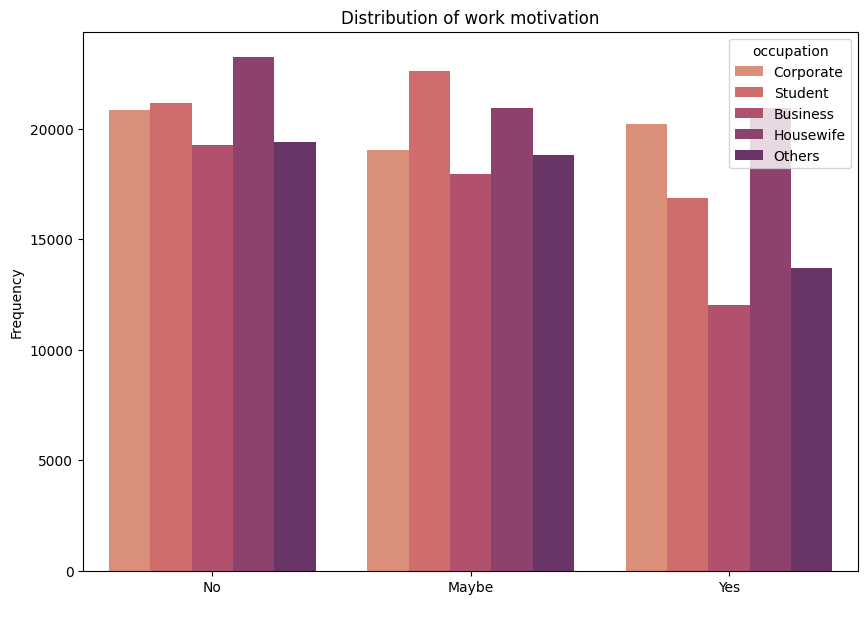

In [208]:
# Vamos a ver el interes en el trabajo y la motivacion en cada profesion
plt.figure(figsize=(10, 7))
sns.countplot(x='work_interest', data=data, palette = 'flare', hue='occupation')
plt.title('Distribution of work motivation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Aqui podemos ver que los mas y los menos motivados son los/las amos/as de casa, mientras que los que mas dudan de si estan motivados son los estudiantes. 
Tambien habria que ver la destribucion de generos aqui, ya que podria varias segun cuantos datos de cada profesion tengamos, y podrian estar sesgados los datos.

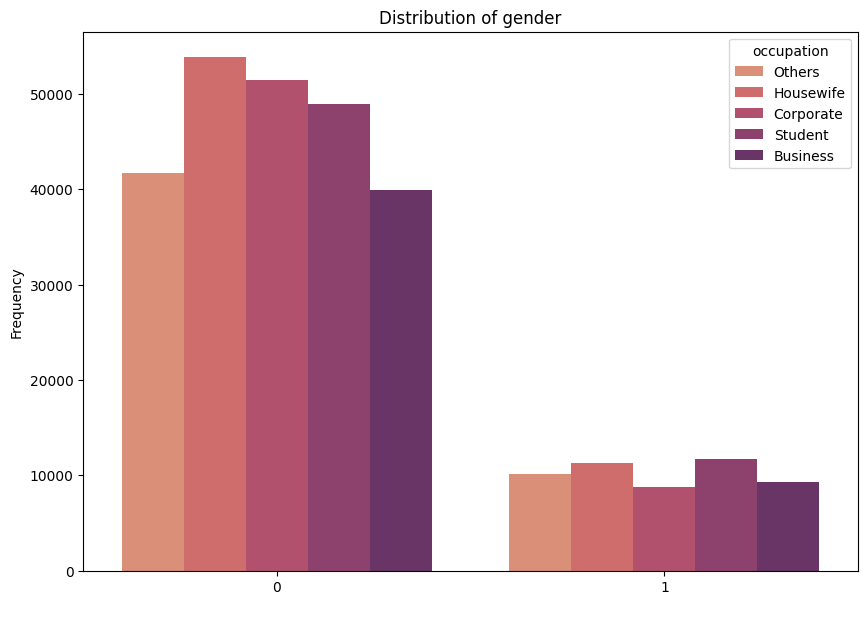

In [209]:
plt.figure(figsize=(10, 7))
sns.countplot(x='gender', data=data, palette = 'flare', hue='occupation')
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

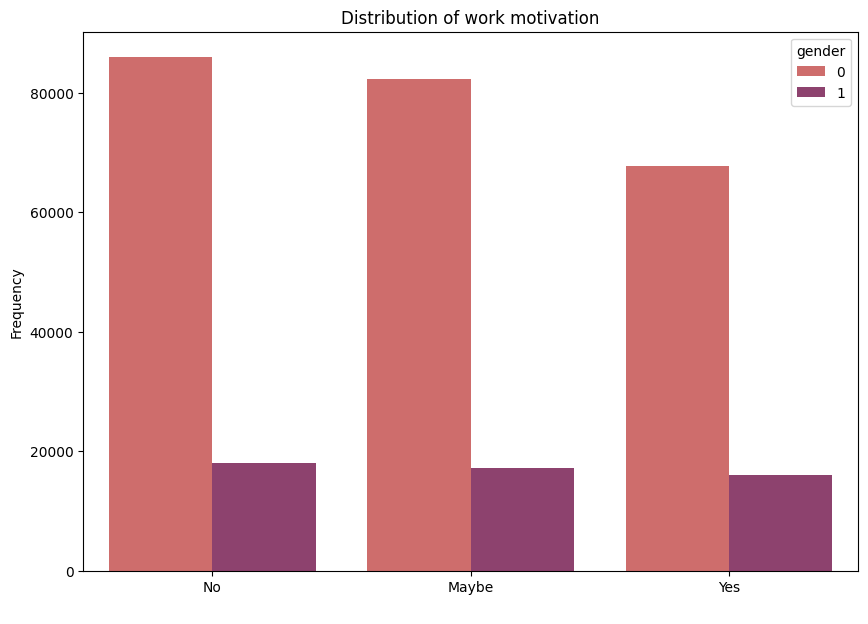

In [210]:
plt.figure(figsize=(10, 7))
sns.countplot(x='work_interest', data=data, palette = 'flare', hue='gender')
plt.title('Distribution of work motivation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

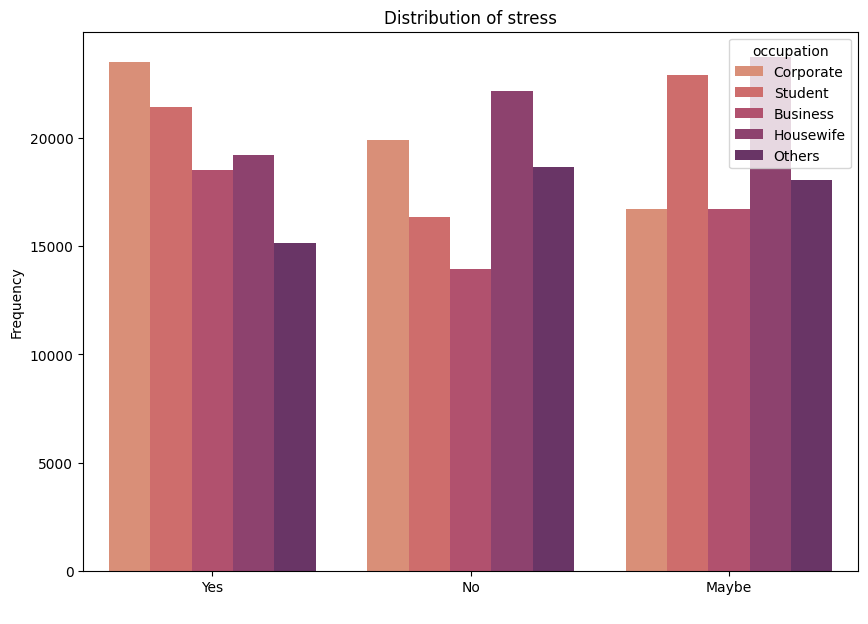

In [211]:
# Vamos a ver el nivel de estres y cada profesion
plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=data, palette = 'flare', hue='occupation')
plt.title('Distribution of stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

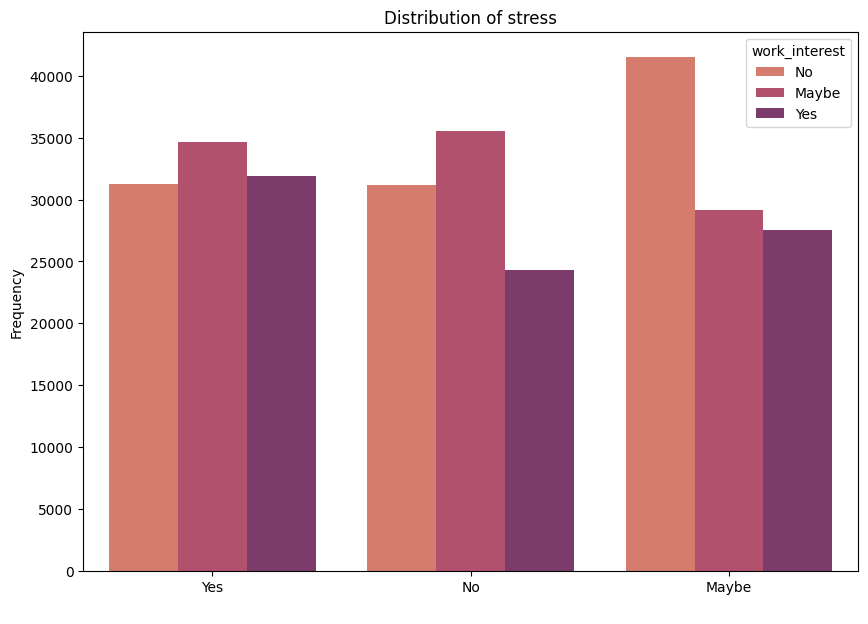

In [212]:
# Vamos a ver el nivel de estres y la motivacion en el trabajo
plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=data, palette = 'flare', hue='work_interest')
plt.title('Distribution of stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Hay un alto numero de personas que no estan motivados y sienten que quiza este subiendo su estres, mientras que los que mas motivados estan en su trabajo son aquellos que mas estres tienen.

In [213]:
# Vamos a ver la correlacion entre estos datos
stress = data["growing_stress"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)
interest = data["work_interest"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)

correlacion , pv = stats.pearsonr(stress, interest)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el creciente nivel de estres y la motivacion en el trabajo"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el creciente nivel de estres y la motivacion en el trabajo"


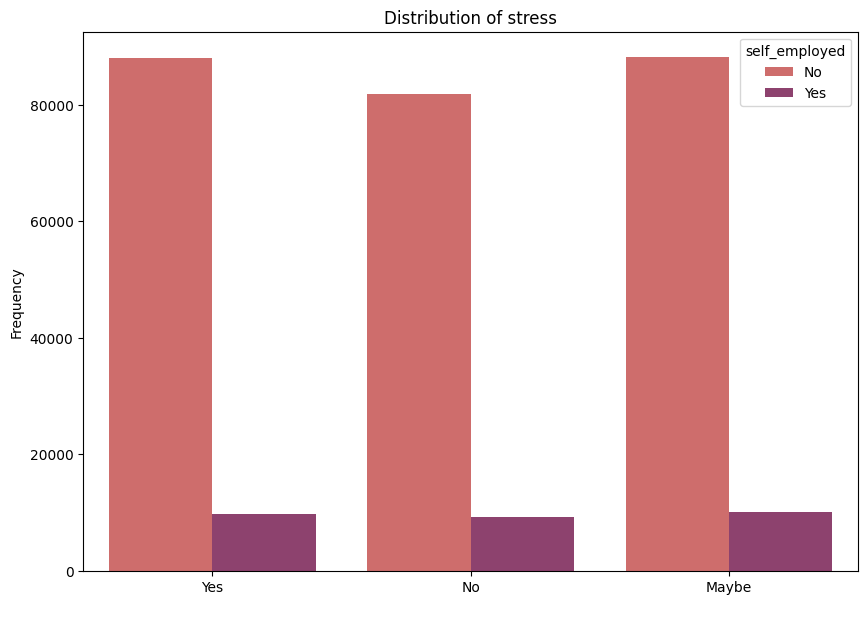

In [214]:
# Vamos a ver el nivel de estres y la ser autonomo
plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=data, palette = 'flare', hue='self_employed')
plt.title('Distribution of stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

No parece haber datos significativos que demuestren una diferencia entre ser autonomo o no

### Genero

Vamos a estudiar como el genero afecta al estres y al tratamiento de enfermedades mentales.

Aqui habra que tener en cuenta la diferencia en los datos entre hombres y mujeres, ya que no seran resultados del todo fiables.

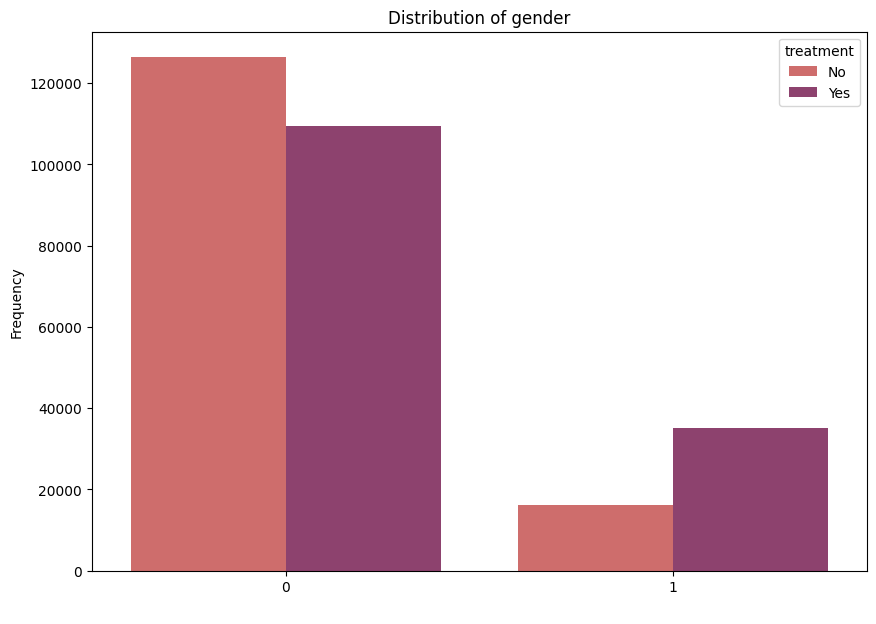

In [215]:
# Vamos a ver el genero y el tratamiento
plt.figure(figsize=(10, 7))
sns.countplot(x='gender', data=data, palette = 'flare', hue='treatment')
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Hay un mayor numero de mujeres que buscan tratamiento frente a las que no, al reves que los hombres. Esto puede representar o bien que tienen menos enfermedades o bien que buscan ayuda menos.

In [216]:
# Vamos a ver el valor real teniendo en cuenta las proporciones de hombres frente a mujeres
print("Hombres que tienen tratamiento:", len(data[(data['gender'] == 0) & (data['treatment'] == "Yes")]) * (1 - data["gender"].mean()))
print("Mujeres que tienen tratamiento:", len(data[(data['gender'] == 1) & (data['treatment'] == "Yes")]) * (data["gender"].mean()))

print("Hombres que no tienen tratamiento:", len(data[(data['gender'] == 0) & (data['treatment'] == "No")]) * (1 - data["gender"].mean()))
print("Mujeres que no tienen tratamiento:", len(data[(data['gender'] == 1) & (data['treatment'] == "No")]) * (data["gender"].mean()))

# Mientras que hay mas hombres que tienen tratamiento frente a mujeres que no lo tienen (puede deberse a las pocas muestras de mujeres en este estudio), es muchisima mas la diferencia entre los hombres que no lo tienen frente a las mujeres que si

Hombres que tienen tratamiento: 90045.89917886071
Mujeres que tienen tratamiento: 6269.306690996719
Hombres que no tienen tratamiento: 103825.16488950489
Mujeres que no tienen tratamiento: 2863.757377368872


In [217]:
# Vamos a ver la correlacion entre estos datos
treat = data["treatment"].apply(lambda x: 1 if x == "Yes" else 0)
gender = data["gender"]

correlacion , pv = stats.pearsonr(treat, gender)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el tratamiento de enfermedades mentales y el genero"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el tratamiento de enfermedades mentales y el genero"


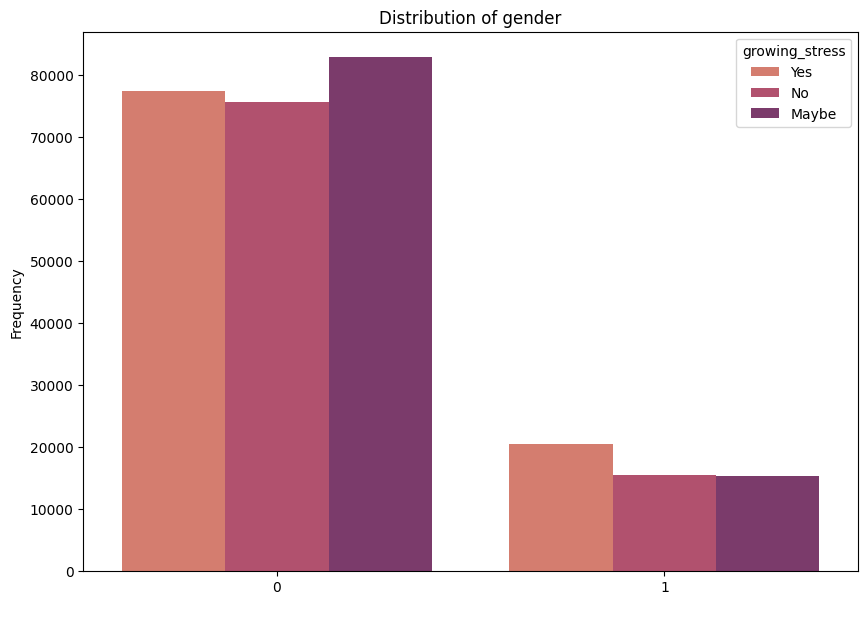

In [218]:
# Vamos a ver el genero y el nivel de estres
plt.figure(figsize=(10, 7))
sns.countplot(x='gender', data=data, palette = 'flare', hue='growing_stress')
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Parece que las mujeres tienen proporcionalmente un mayor estres, mientras que los hombres dudan mas de si esta aumentando su estres

In [219]:
# Vamos a ver la correlacion entre estos datos
treat = data["growing_stress"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)
gender = data["gender"]

correlacion , pv = stats.pearsonr(treat, gender)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el crecimiento del estres y el genero"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre el crecimiento del estres y el genero"


## Entorno

Veremos como puede afectar el enorno a los niveles de estres y a los tratamientos.

#### Pais en el que resides

In [220]:
data["treatment"] = data['treatment'].apply(lambda x: 1 if x == "Yes" else 0)

data.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
3,1,United States,Corporate,No,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,2014,8
4,1,United States,Corporate,No,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,2014,8
5,1,Poland,Corporate,No,No,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure,2014,8
6,1,Australia,Corporate,No,Yes,1,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,2014,8
7,1,United States,Corporate,No,No,0,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,2014,8


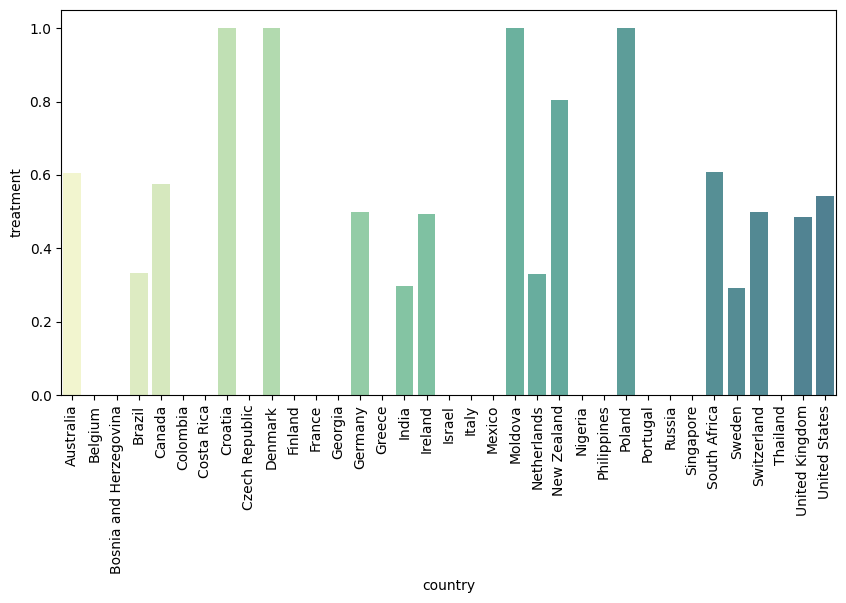

In [221]:
import cmocean

plt.figure(figsize=(10, 5))
graph_data = data.groupby("country")['treatment'].mean()

palette = sns.color_palette("cmo.deep", n_colors=64, desat=1)
my_plot = sns.barplot(data=graph_data, palette=palette)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);

Aqui podemos ver que hay paises en los que hay una gran diferencia en la cantidad de tratamiento de enfermedades de salud mental que hay

In [308]:
# Los paises en los que mas se tratan enfermedades mentales:
data.groupby("country")["treatment"].mean().sort_values(ascending=False).head(15)



country
Poland            1.000000
Croatia           1.000000
Denmark           1.000000
Moldova           1.000000
New Zealand       0.804413
South Africa      0.608826
Australia         0.604381
Canada            0.575416
United States     0.541189
Switzerland       0.500000
Germany           0.500000
Ireland           0.492069
United Kingdom    0.486331
Brazil            0.333333
Netherlands       0.330845
Name: treatment, dtype: float64

In [223]:
# Los paises en los que menos se tratan enfermedades mentales:
data.groupby("country")["treatment"].mean().sort_values().head()

country
Belgium                   0.0
Bosnia and Herzegovina    0.0
Costa Rica                0.0
Colombia                  0.0
Georgia                   0.0
Name: treatment, dtype: float64

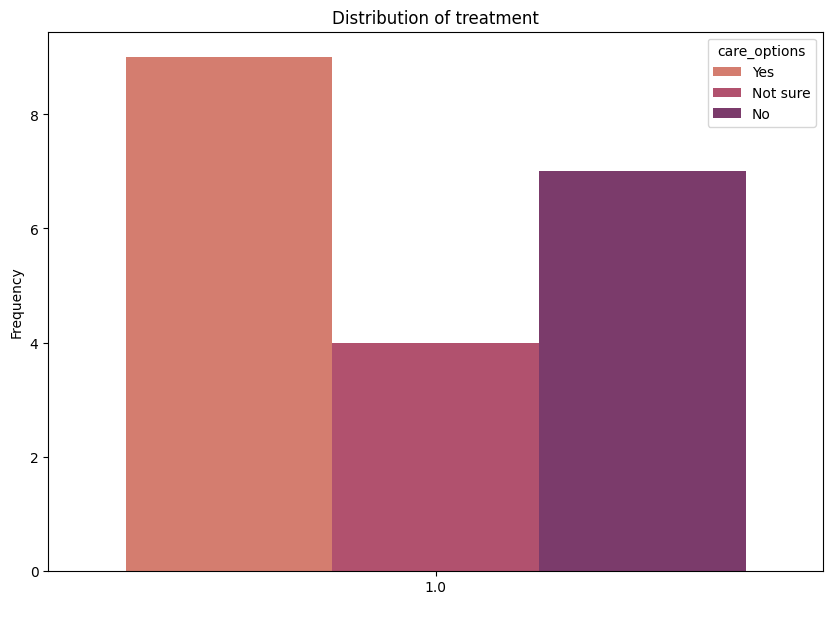

3         0.541189
4         0.541189
5         1.000000
6         0.604381
7         0.541189
            ...   
292359    0.541189
292360    0.608826
292361    0.541189
292362    0.541189
292363    0.541189
Name: treat_mean, Length: 287162, dtype: float64

In [309]:
# Vamos a comparar esto la correlacion con la opcion a cuidados en cada uno:

data["treat_mean"] = data.groupby('country')["treatment"].transform(lambda x: x.mean())

plt.figure(figsize=(10, 7))
sns.countplot(x="treat_mean", data=data.sort_values(by="treat_mean").tail(20), palette = 'flare', hue="care_options")
plt.title('Distribution of treatment')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

data["treat_mean"]



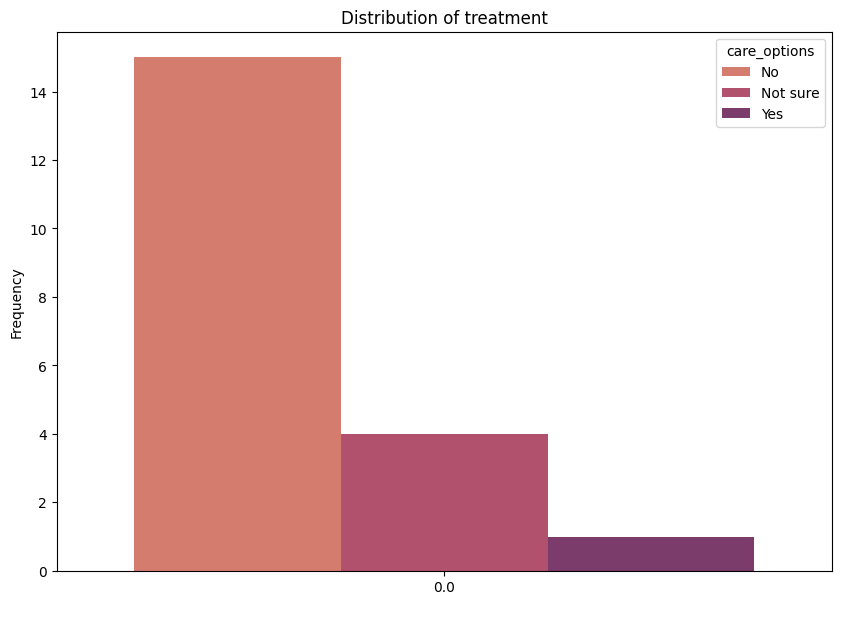

In [225]:
# Vamos a comparar esto la correlacion con la opcion a cuidados en cada uno:

data["treat_mean"] = data.groupby('country')["treatment"].transform(lambda x: x.mean())

data

plt.figure(figsize=(10, 7))
sns.countplot(x="treat_mean", data=data.sort_values(by="treat_mean").head(20), palette = 'flare', hue="care_options")
plt.title('Distribution of treatment')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Es bastante evidente que en paises donde mas se tratan enfermedades mentales hay una correlacion con las opciones de cuidados que tienen a su alcance.

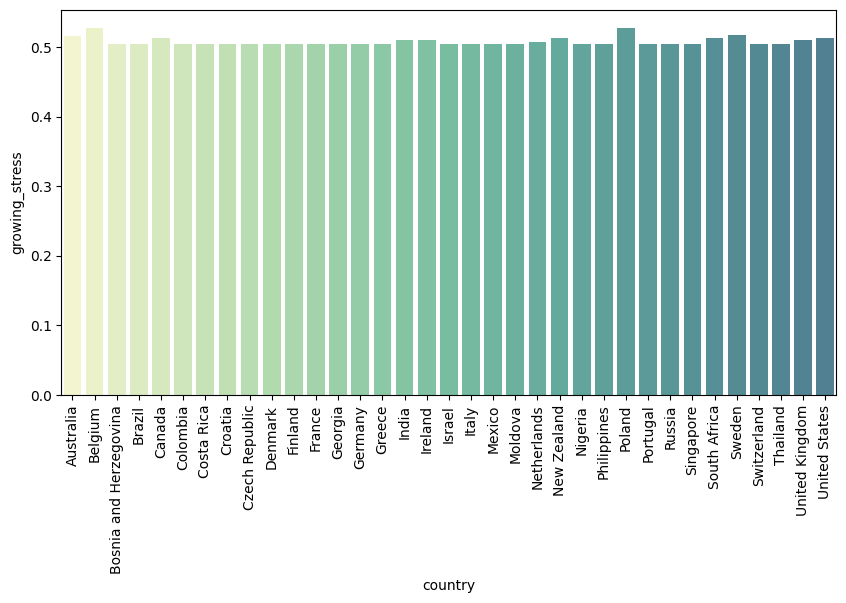

In [226]:
data["growing_stress"] = data['growing_stress'].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)

plt.figure(figsize=(10, 5))
graph_data = data.groupby("country")['growing_stress'].mean()

palette = sns.color_palette("cmo.deep", n_colors=64, desat=1)
my_plot = sns.barplot(data=graph_data, palette=palette)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);

El crecimiento del estres parece estar bastante igualado de forma independiente del pais en el que vivas.

#### Aislamiento, rutinas y entorno social

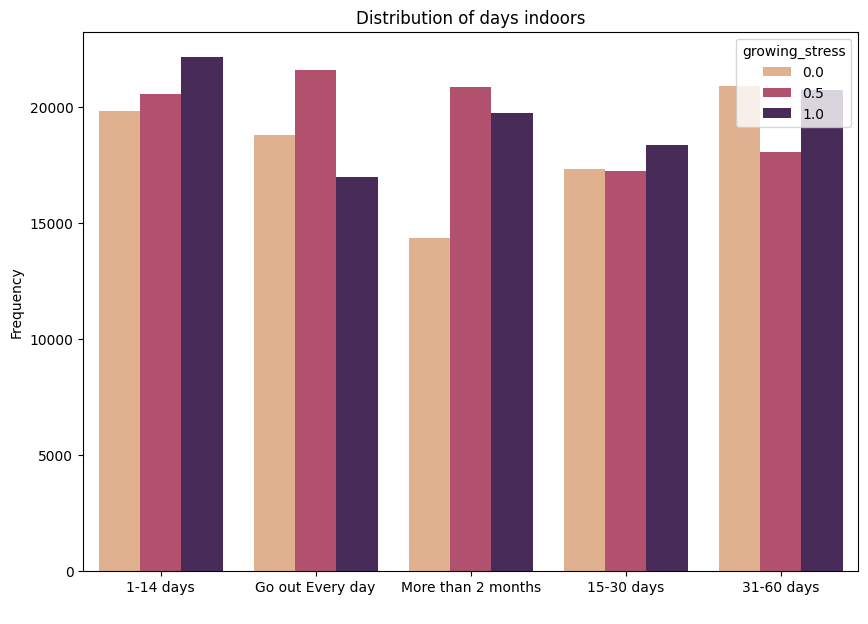

In [227]:
# Vamos a ver como afecta cuanto sales de casa con el nivel de estres:

plt.figure(figsize=(10, 7))
sns.countplot(x="days_indoors", data=data, palette = 'flare', hue="growing_stress")
plt.title('Distribution of days indoors')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Vemos que lso que salen de casa todos los dias tienen el menor numero de aumento de estres, aunque luego se ve una subida significativo en el siguiente rango de dias.

Aquellos que menos salen tienen una cantidad de respuestas positivas al estres mucho mayor que las negativas.

In [228]:
# Vamos a ver la correlacion entre estos datos
grupos_tend = data.groupby('days_indoors')['growing_stress']
one_14 = grupos_tend.get_group('1-14 days')
every_day = grupos_tend.get_group('Go out Every day')
two_months = grupos_tend.get_group('More than 2 months')
fifteen_30 = grupos_tend.get_group('15-30 days')
thirtyone_60 = grupos_tend.get_group('31-60 days')

anova = stats.f_oneway(one_14, every_day, two_months, fifteen_30, thirtyone_60)
anova


if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en los dias que pasas encerrado y el nivel de estres"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en los dias que pasas encerrado y el nivel de estres"


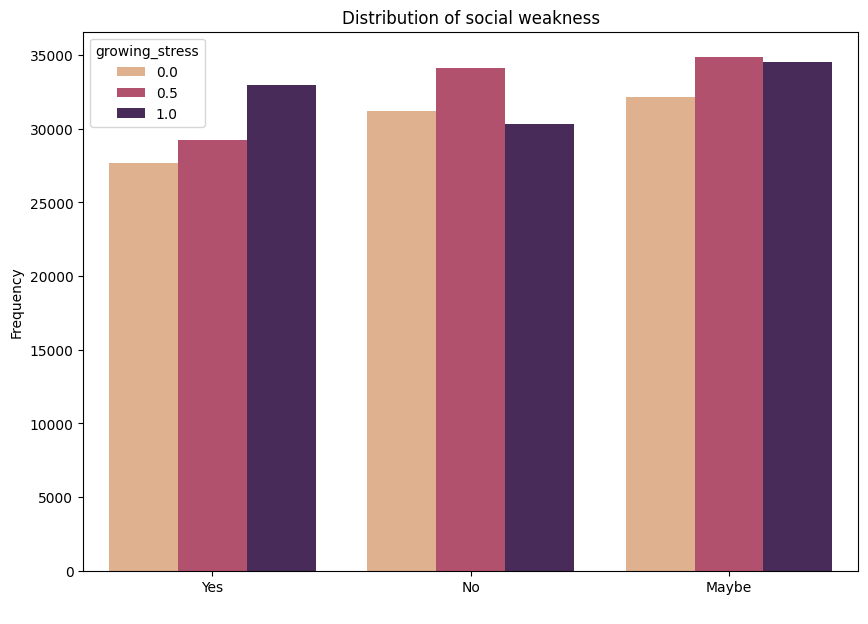

In [229]:
# Vamos a ver como afecta como de fuerte es tu entorno social al nivel de estres:

plt.figure(figsize=(10, 7))
sns.countplot(x="social_weakness", data=data, palette = 'flare', hue="growing_stress")
plt.title('Distribution of social weakness')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Hay niveles mas altos de estres entre aquellos que contestaron que si o que quiza tenian un ambiente social debil.

In [230]:
# Vamos a ver la correlacion entre estos datos
grupos_tend = data.groupby('social_weakness')['growing_stress']
yes = grupos_tend.get_group('Yes')
no = grupos_tend.get_group('No')
maybe = grupos_tend.get_group('Maybe')

anova = stats.f_oneway(yes, no, maybe)
anova


if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en el grado de debilidad de tu entorno social y el nivel de estres"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en el grado de debilidad de tu entorno social y el nivel de estres"


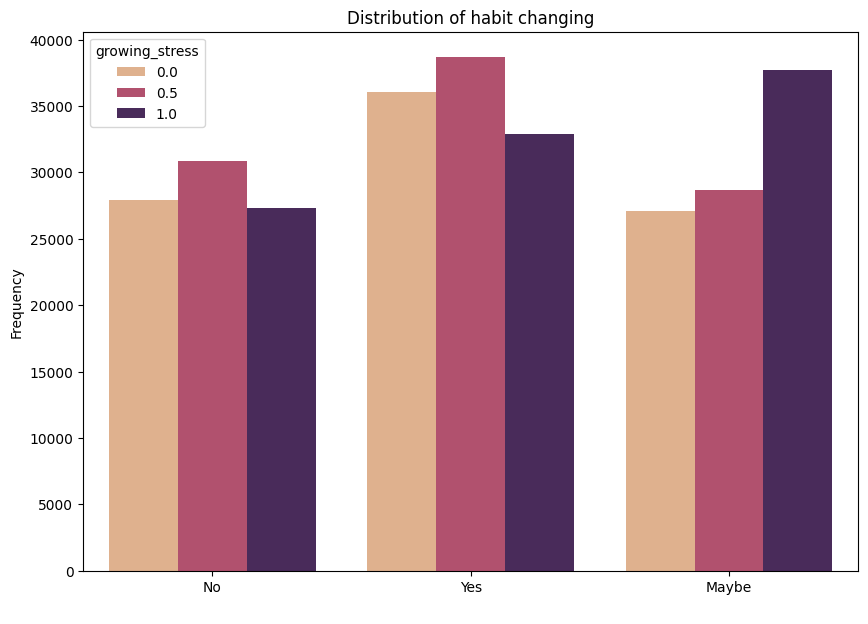

In [231]:
# Vamos a ver como afecta cuanto si cambias habitos con el nivel de estres:

plt.figure(figsize=(10, 7))
sns.countplot(x="changes_habits", data=data, palette = 'flare', hue="growing_stress")
plt.title('Distribution of habit changing')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [316]:
grupos_tend = data.groupby('changes_habits')['growing_stress']
yes = grupos_tend.get_group('Yes')
no = grupos_tend.get_group('No')
maybe = grupos_tend.get_group('Maybe')

anova = stats.f_oneway(yes, no, maybe)
anova


if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en el grado de debilidad de tu entorno social y el nivel de estres"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en el grado de debilidad de tu entorno social y el nivel de estres"


El grafico parece indicar que aquellos que cambian habitos tienen una diferencia mayor entre los que sufren estres y los que no, siendo la respuesta negativa mucho mayor proporcionalmente a la positiva frente a aquellos que no cambian habitos.
Aquellos que quiza cambian de habitos tienen un nivel de estres mucho mas alto que los demas.

## Historial medico y familiar

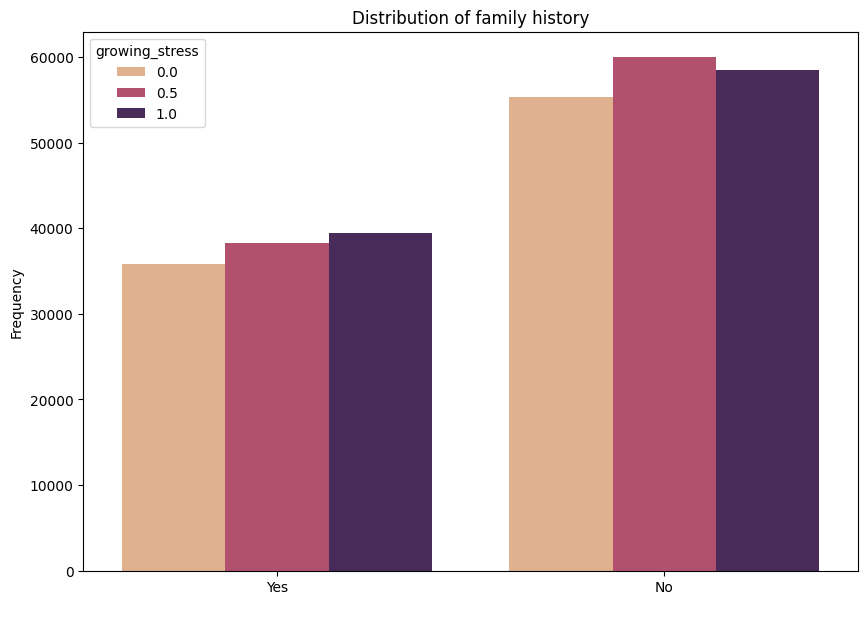

In [232]:
# Vamos a ver como afecta si en tu familia ha habido antecedentes de enfermedades mentales en tu nivel de estres y tu tratamiento:

plt.figure(figsize=(10, 7))
sns.countplot(x="family_history", data=data, palette = 'flare', hue="growing_stress")
plt.title('Distribution of family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Parece indicar que aquellos con antecedentes familiares tienen un menos nivel de estres que aquellos que no los tienen, puede tener relacion con que aquellos que tengan antecedentes probablemente tengan un tratamiento.

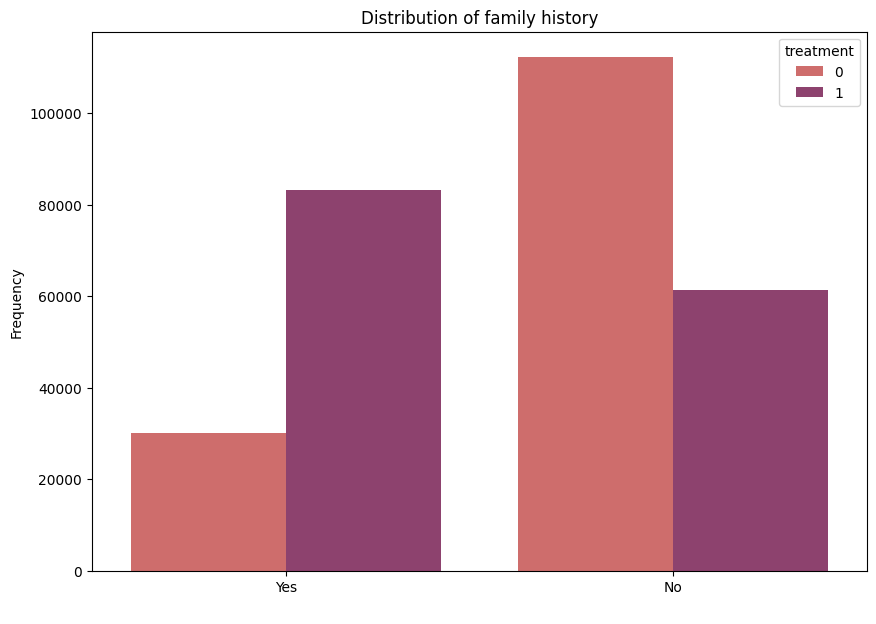

In [233]:
# Vamos a ver como afecta si en tu familia ha habido antecedentes de enfermedades mentales en tu nivel de estres y tu tratamiento:

plt.figure(figsize=(10, 7))
sns.countplot(x="family_history", data=data, palette = 'flare', hue="treatment")
plt.title('Distribution of family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Como se podia esperar, aquellos con antecedentes familiares de enfermedad mental tienen un mayor numero de tratamientos que aquellos que no los tienen.

In [239]:
fam_hist = data["family_history"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)
treat = data["treatment"]

correlacion , pv = stats.pearsonr(treat, fam_hist)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre los antecedentes familiares y el tratamiento de enfermedades mentales"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre los antecedentes familiares y el tratamiento de enfermedades mentales"


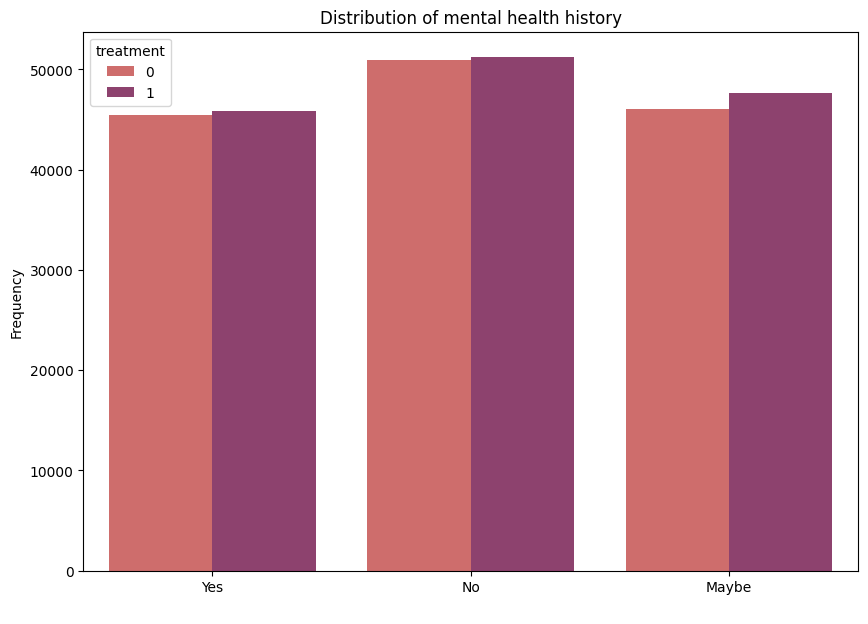

In [241]:
# Vamos a ver como afecta si tienes un historial medico de enfermedades mentales en tu nivel de estres y tu tratamiento:

plt.figure(figsize=(10, 7))
sns.countplot(x="mh_history", data=data, palette = 'flare', hue="treatment")
plt.title('Distribution of mental health history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

No parece que tener un historial medico afecta en si tienes un tratamiento o no.

In [244]:
fam_hist = data["mh_history"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)
treat = data["treatment"]

correlacion , pv = stats.pearsonr(treat, fam_hist)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener un historial medico de enfermedades mentales y eestar en tratamiento"')
else:
    print('No rechazamos la hipótesis nula')

No rechazamos la hipótesis nula


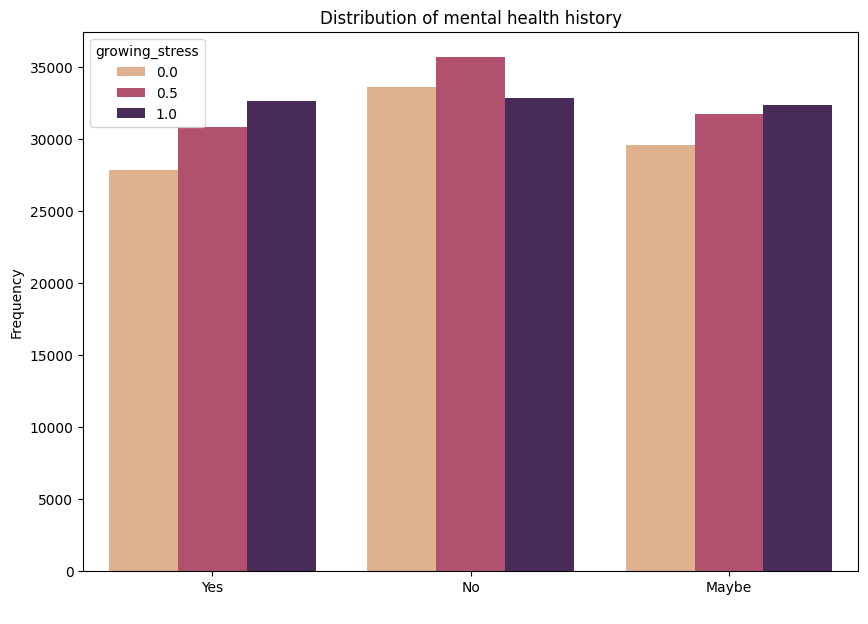

In [242]:
plt.figure(figsize=(10, 7))
sns.countplot(x="mh_history", data=data, palette = 'flare', hue="growing_stress")
plt.title('Distribution of mental health history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [310]:
fam_hist = data["mh_history"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 0.5)
treat = data["growing_stress"]

correlacion , pv = stats.pearsonr(treat, fam_hist)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener un historial medico de enfermedades mentales y eestar en tratamiento"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener un historial medico de enfermedades mentales y eestar en tratamiento"


## Comparacion con dataset solo de estudiantes

Vamos a analizar datos solo con referencia a los estudiantes para poder comparar los datos con el otro DataSet que tenemos

In [262]:
data_students = pd.read_csv('data/Students_Mental_Health.csv')

In [263]:
data_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [268]:
data_students.columns = [x.lower() for x in data_students.columns]

In [269]:
data_students.dropna(axis=0)

data.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month,treat_mean
3,1,United States,Corporate,No,Yes,1,1-14 days,1.0,No,Yes,Medium,No,No,Yes,Maybe,Yes,2014,8,0.541189
4,1,United States,Corporate,No,Yes,1,1-14 days,1.0,No,Yes,Medium,No,No,Yes,No,Yes,2014,8,0.541189
5,1,Poland,Corporate,No,No,1,1-14 days,1.0,No,Yes,Medium,No,No,Yes,Maybe,Not sure,2014,8,1.000000
6,1,Australia,Corporate,No,Yes,1,1-14 days,1.0,No,Yes,Medium,No,No,Yes,No,Not sure,2014,8,0.604381
7,1,United States,Corporate,No,No,0,1-14 days,1.0,No,Yes,Medium,No,No,Yes,No,No,2014,8,0.541189


In [246]:
data_s = data[data["occupation"] == "Student"]

data_s.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mh_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month,treat_mean
124,1,United States,Student,No,Yes,1,Go out Every day,0.0,Yes,No,Medium,Yes,Maybe,No,Maybe,Yes,2014,8,0.541189
125,1,United States,Student,No,Yes,1,Go out Every day,0.0,Yes,No,Medium,Yes,Maybe,No,No,Yes,2014,8,0.541189
126,1,Poland,Student,No,No,1,Go out Every day,0.0,Yes,No,Medium,Yes,Maybe,No,Maybe,Not sure,2014,8,1.000000
127,1,Australia,Student,No,Yes,1,Go out Every day,0.0,Yes,No,Medium,Yes,Maybe,No,No,Not sure,2014,8,0.604381
128,1,United States,Student,No,No,0,Go out Every day,0.0,Yes,No,Medium,Yes,Maybe,No,No,No,2014,8,0.541189


In [247]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60687 entries, 124 to 291748
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   60687 non-null  int64  
 1   country                  60687 non-null  object 
 2   occupation               60687 non-null  object 
 3   self_employed            60687 non-null  object 
 4   family_history           60687 non-null  object 
 5   treatment                60687 non-null  int64  
 6   days_indoors             60687 non-null  object 
 7   growing_stress           60687 non-null  float64
 8   changes_habits           60687 non-null  object 
 9   mh_history               60687 non-null  object 
 10  mood_swings              60687 non-null  object 
 11  coping_struggles         60687 non-null  object 
 12  work_interest            60687 non-null  object 
 13  social_weakness          60687 non-null  object 
 14  mental_health_interview 

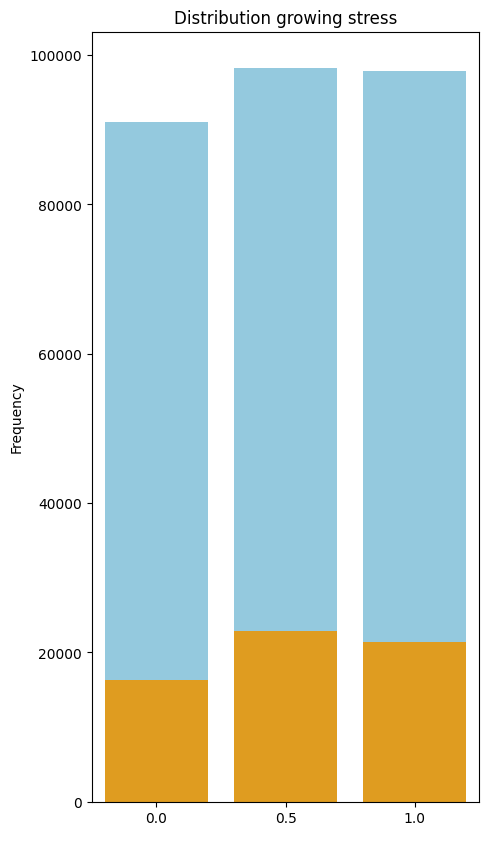

In [307]:
# COmparacion entre niveles de estres de toda la poblacion y solo los estudiantes de la muestra
plt.figure(figsize=(5, 10))
sns.countplot(x="growing_stress", data=data, color="skyblue")
plt.title('Distribution growing stress')
plt.xlabel(' ')
plt.ylabel('Frequency')

sns.countplot(x="growing_stress", data=data_s, color="orange")
plt.title('Distribution growing stress')
plt.xlabel(' ')
plt.ylabel('Frequency')

plt.show()

# Proporcionalmente el nivel de estres en ambos grupos parece similar

Volvemos a comprobar la distribusion de generos

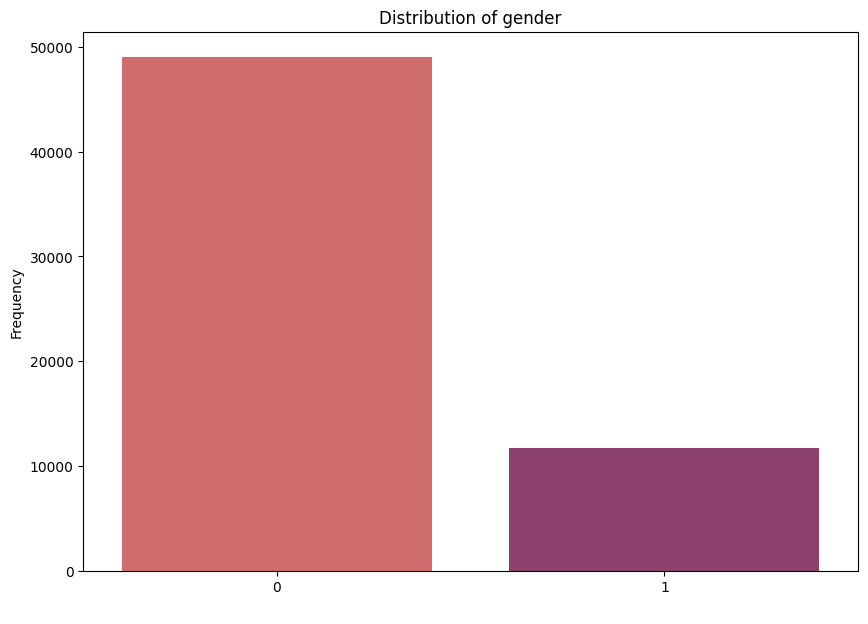

In [257]:
plt.figure(figsize=(10, 7))
sns.countplot(x="gender", data=data_s, palette = 'flare')
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

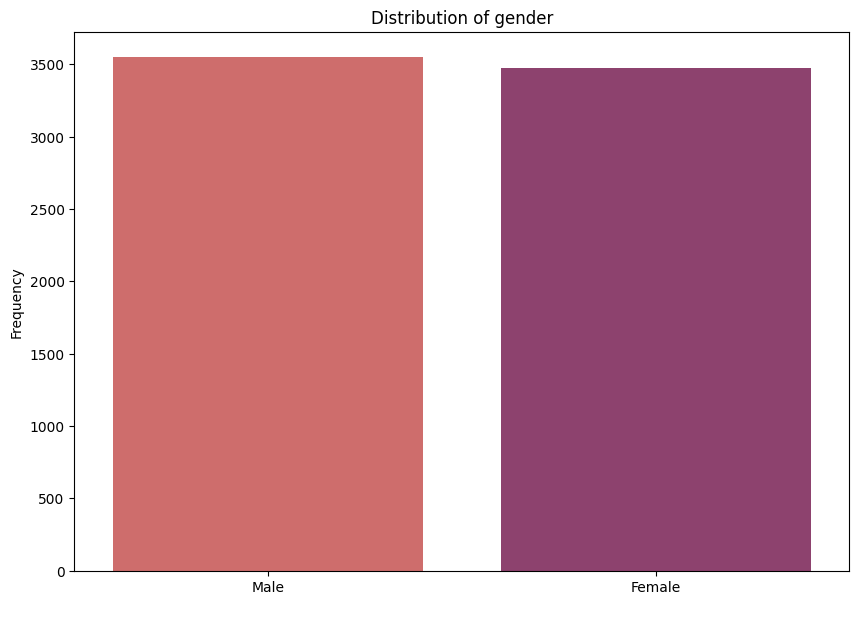

In [270]:
plt.figure(figsize=(10, 7))
sns.countplot(x="gender", data=data_students, palette = 'flare')
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

En el segundo dataset vemos una mejor distribucion de generos, esto nos permitira hacer un mejor estudio del  nivel de estres entre generos. 

Aprovechando que los numeros son mas igualados vamos a comparar tambien en este DataSet nuevo varios valores medidos anteriormente:

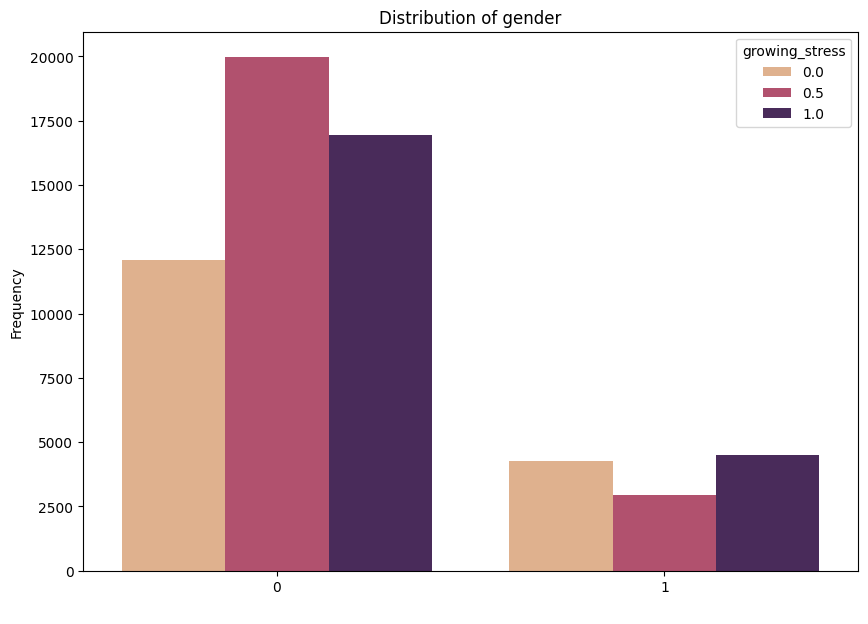

In [272]:
# Aumento de estres en ambos generos:
plt.figure(figsize=(10, 7))
sns.countplot(x="gender", data=data_s, palette = 'flare', hue="growing_stress")
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

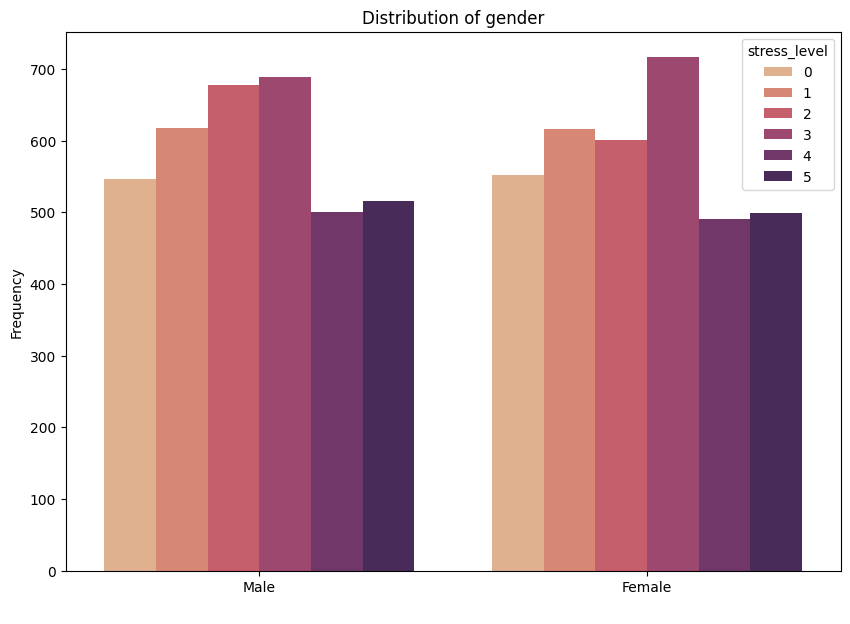

In [271]:
plt.figure(figsize=(10, 7))
sns.countplot(x="gender", data=data_students, palette = 'flare', hue="stress_level")
plt.title('Distribution of gender')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

Con la segunda muestra la igualdad de participacion muesta que no hay una diferencia apreciable entre los niveles de estres

In [275]:
stress = data_s["growing_stress"]
gender = data_s["gender"]

correlacion , pv = stats.pearsonr(stress, gender)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener estres y tu genero en estudiantes"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener un historial medico de enfermedades sexuales y eestar en tratamiento"


In [277]:
stress = data_students["stress_level"]
gender = data_students["gender"].apply(lambda x: 1 if x == "Female" else 0)

correlacion , pv = stats.pearsonr(stress, gender)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tu nivel de estres y tu genero en estudiantes"')
else:
    print('No rechazamos la hipótesis nula')

No rechazamos la hipótesis nula


Otro dato que podemos comparar es el de apoyo social:

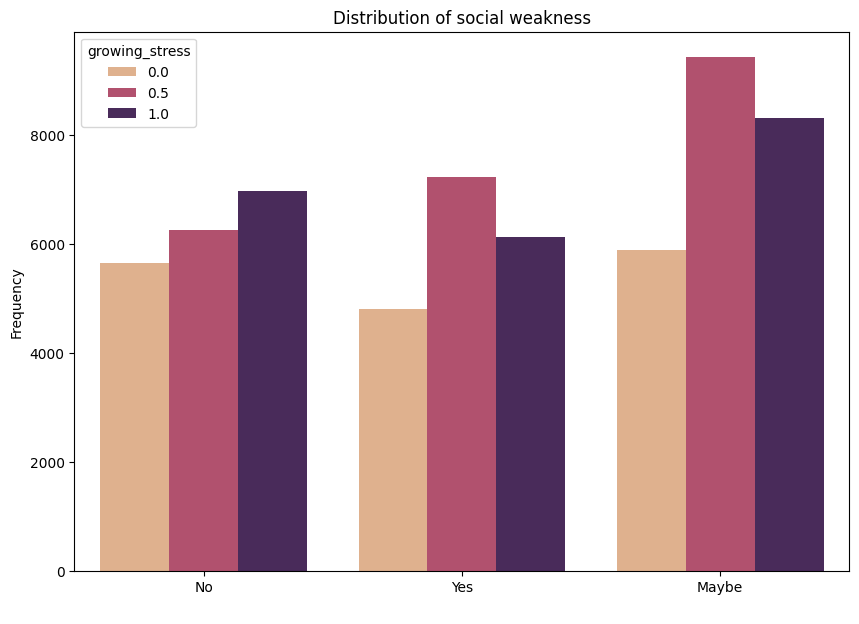

In [279]:
plt.figure(figsize=(10, 7))
sns.countplot(x="social_weakness", data=data_s, palette = 'flare', hue="growing_stress")
plt.title('Distribution of social weakness')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [285]:
stress = data_s["growing_stress"]
social = data_s["social_weakness"].apply(lambda x: 0 if x == "No" else 1 if x == "Yes" else 0.5)

correlacion , pv = stats.pearsonr(stress, social)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener un apoyo social y tener niveles altos de estres"')
else:
    print('No rechazamos la hipótesis nula')

No rechazamos la hipótesis nula


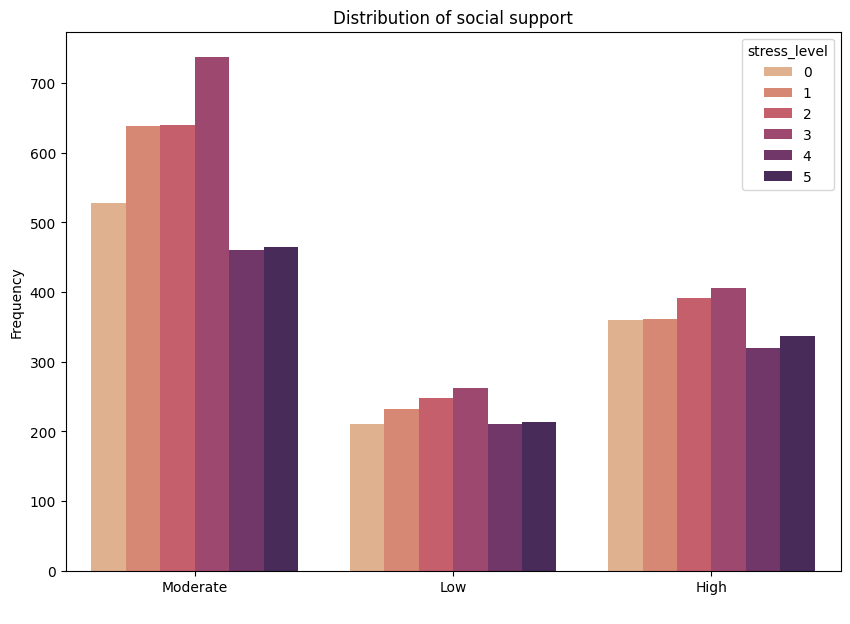

In [281]:
plt.figure(figsize=(10, 7))
sns.countplot(x="social_support", data=data_students, palette = 'flare', hue="stress_level")
plt.title('Distribution of social support')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [283]:
fam_hist = data_students["stress_level"]
treat = data_students["social_support"].apply(lambda x: 0 if x == "Low" else 1 if x == "Moderate" else 2)

correlacion , pv = stats.pearsonr(treat, fam_hist)

if pv < 0.05:
    print('Rechazamos la hipótesis nula "No hay evidencia significativa en la correlación entre tener un apoyo social y tener niveles altos de estres"')
else:
    print('No rechazamos la hipótesis nula')

No rechazamos la hipótesis nula


De esto se puede ver que no es un factor determinante en estudiantes el nivel de apoyo social con la que cuentan.

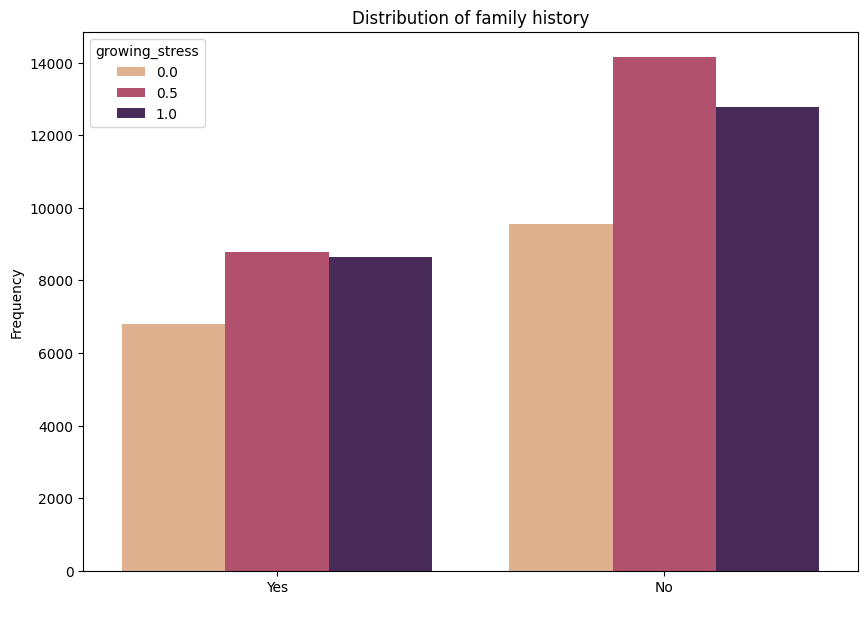

In [303]:
# Comparacion entre ambos datasets del historial familiar:
plt.figure(figsize=(10, 7))
sns.countplot(x="family_history", data=data_s, palette = 'flare', hue="growing_stress")
plt.title('Distribution of family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

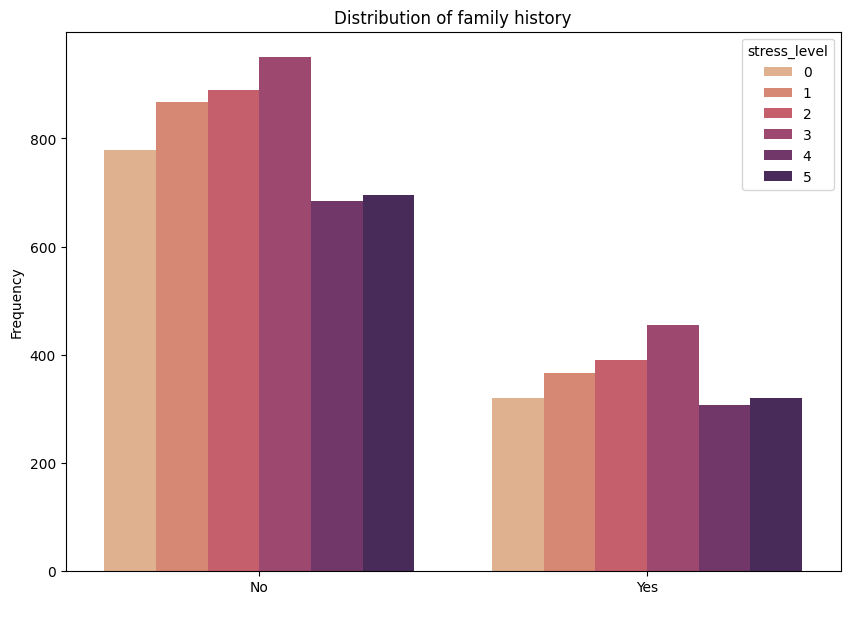

In [301]:
plt.figure(figsize=(10, 7))
sns.countplot(x="family_history", data=data_students, palette = 'flare', hue="stress_level")
plt.title('Distribution of family history')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

The evidence suggests they are both proportionately similiar

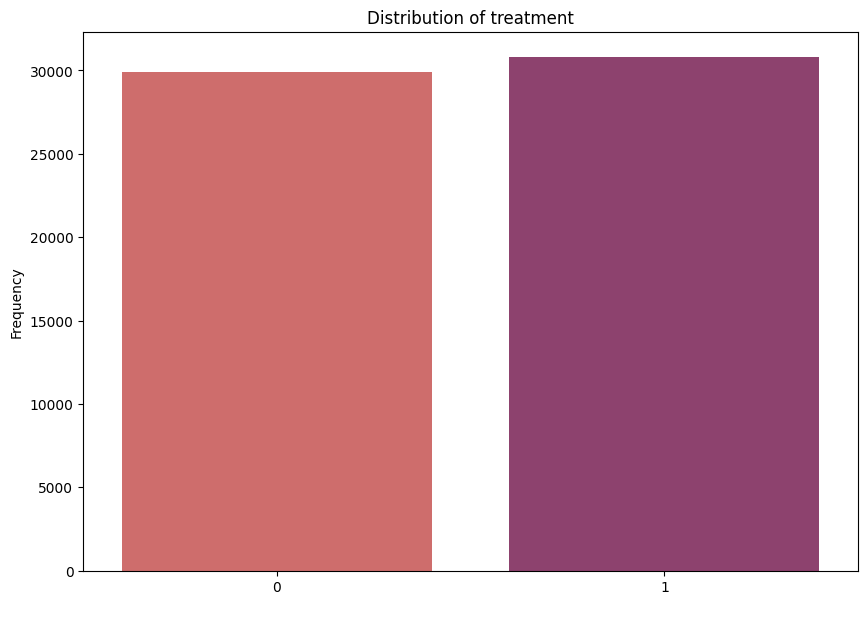

In [312]:
# Comparacion entre ambos datasets el tratamiento o, en el caso del segundo dataset, aquellos con depresion o ansiedad:
plt.figure(figsize=(10, 7))
sns.countplot(x="treatment", data=data_s, palette = 'flare')
plt.title('Distribution of treatment')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

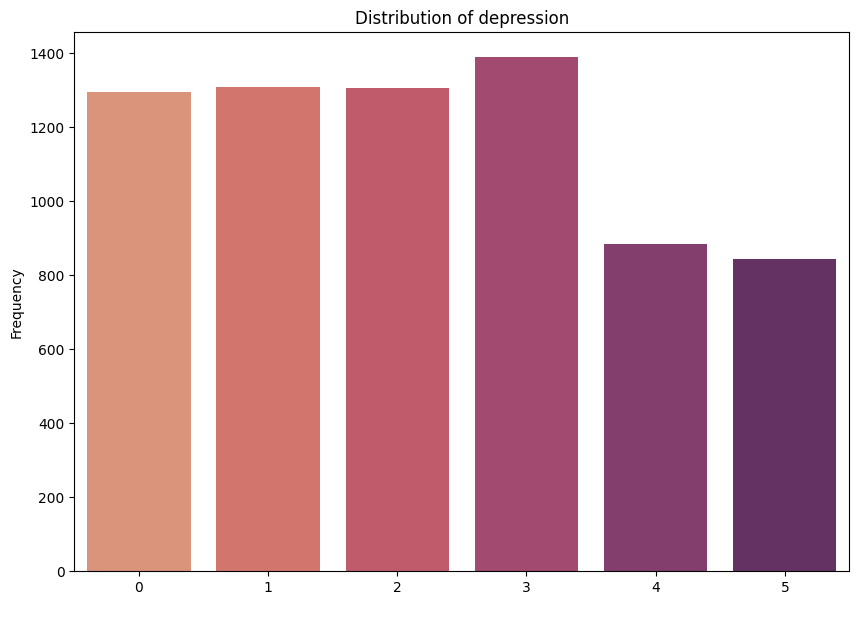

In [311]:
plt.figure(figsize=(10, 7))
sns.countplot(x="depression_score", data=data_students, palette = 'flare')
plt.title('Distribution of depression')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

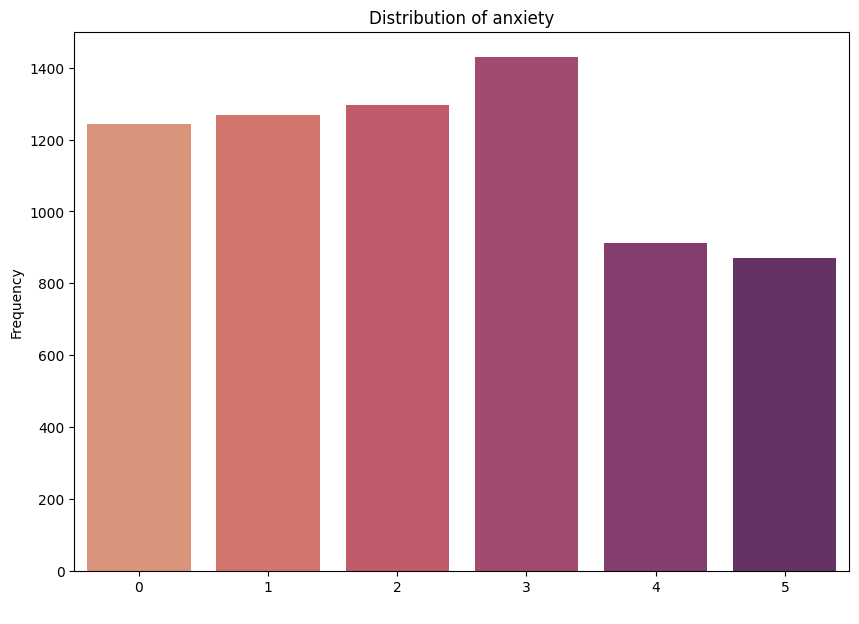

In [313]:
plt.figure(figsize=(10, 7))
sns.countplot(x="anxiety_score", data=data_students, palette = 'flare')
plt.title('Distribution of anxiety')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

En el segundo dataset encontramos niveles de asiedad y depresion mas bajas que aquellos que estan en tratamiento en el primero. Esto es probablemente debido a la comparacion de un dato objetivo, como es estar en tratamiento, como uno subjetivo, el nivel de ansiedad o depresion que consideras que sufres.